<a href="https://colab.research.google.com/github/rakanakmaltge/Project_LinearModel/blob/main/Project_LinearModel_PredictiveModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "dataprepromolingroup5"        "real-estate-price-prediction"

In [ ]:
library(car)
library(relaimpo)
library(ggpubr)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:car’:

    logit


Loading required package: survey

Loading required package: grid

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:boot’:

    aml



Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-U

Package car akan digunakan untuk melakukan perhitungan VIF dalam melakukan cek multicolliniearity.

Package relaimpo akan digunakan untuk melakukan analisis Relative Importance Method dalam melakukan cek variabel yang paling mempengaruhi respon pada model.

In [ ]:
reg_data <- read.csv("../input/dataprepromolingroup5/data_realestate.csv")

 transaction_date   house_age      distance_MRT_station number_conv_stores
 Min.   :2013     Min.   : 0.000   Min.   :  23.38      Min.   : 0.000    
 1st Qu.:2013     1st Qu.: 9.025   1st Qu.: 289.32      1st Qu.: 1.000    
 Median :2013     Median :16.100   Median : 492.23      Median : 4.000    
 Mean   :2013     Mean   :17.713   Mean   :1083.89      Mean   : 4.094    
 3rd Qu.:2013     3rd Qu.:28.150   3rd Qu.:1454.28      3rd Qu.: 6.000    
 Max.   :2014     Max.   :43.800   Max.   :6488.02      Max.   :10.000    
 houseprice_unit_area
 Min.   :  7.60      
 1st Qu.: 27.70      
 Median : 38.45      
 Mean   : 37.98      
 3rd Qu.: 46.60      
 Max.   :117.50      

,transaction_date,house_age,distance_MRT_station,number_conv_stores,houseprice_unit_area
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2012.917,32.0,84.87882,10,37.9
2,2012.917,19.5,306.59470,9,42.2
3,2013.583,13.3,561.98450,5,47.3
4,2013.500,13.3,561.98450,5,54.8
5,2012.833,5.0,390.56840,5,43.1
6,2012.667,7.1,2175.03000,3,32.1


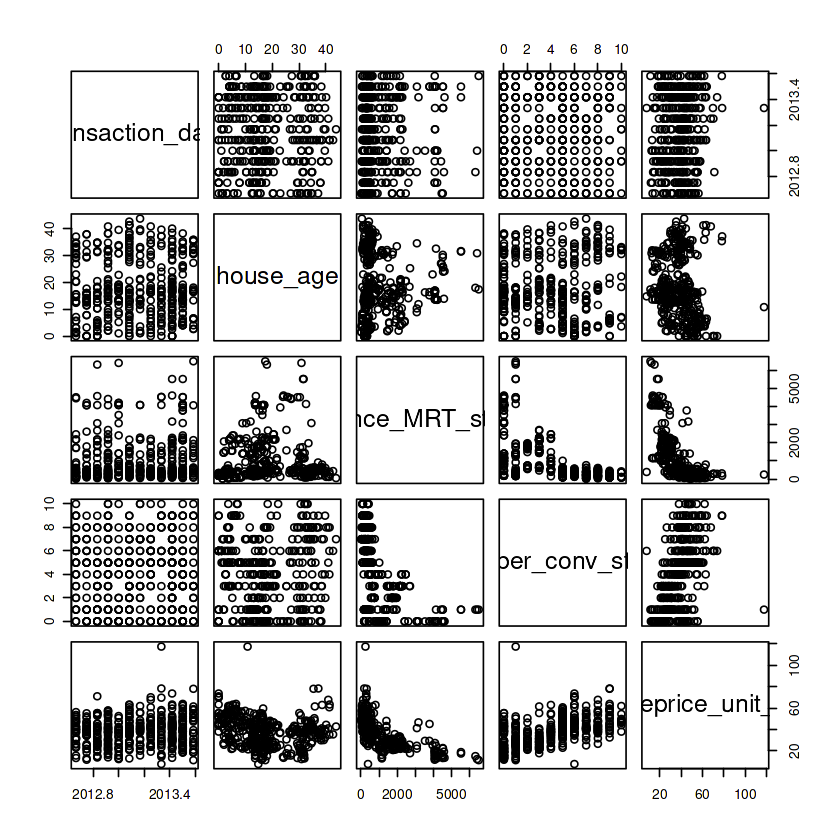

In [ ]:
summary(reg_data)
head(reg_data)
plot(reg_data)

Untuk membuat model yang dapat berjalan dengan baik, maka kita akan melakukan plot setiap data yang menjadi pengaruh nilai y dengan membuat model linier standarnya terlebih dahulu. Apabila data nantinya kurang fitted terhadap model, maka akan dilakukan beberapa cara untuk memperbaharui model

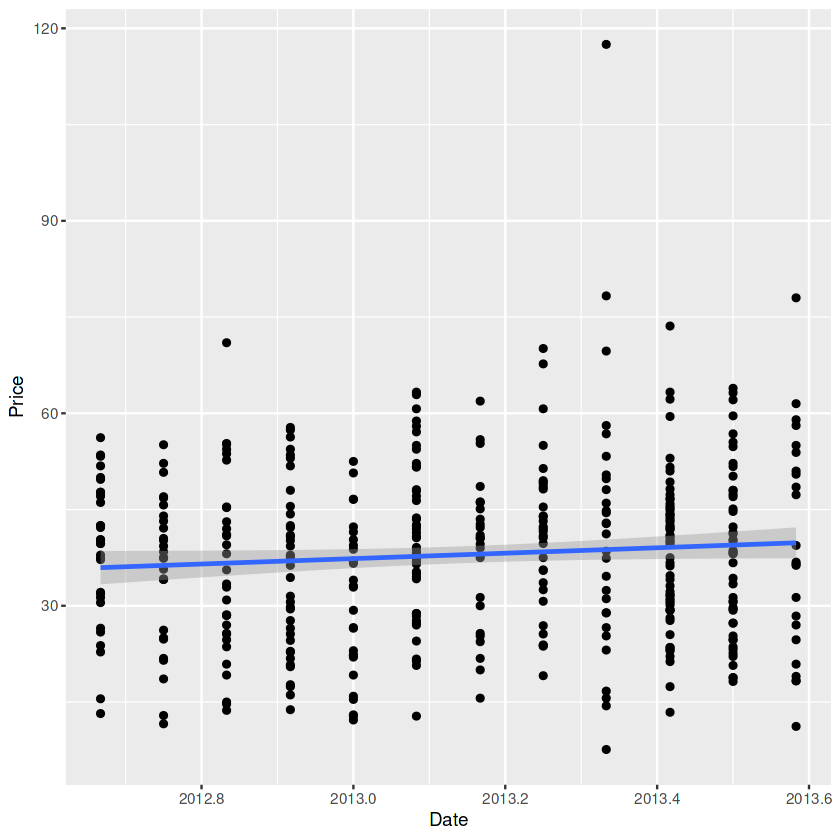

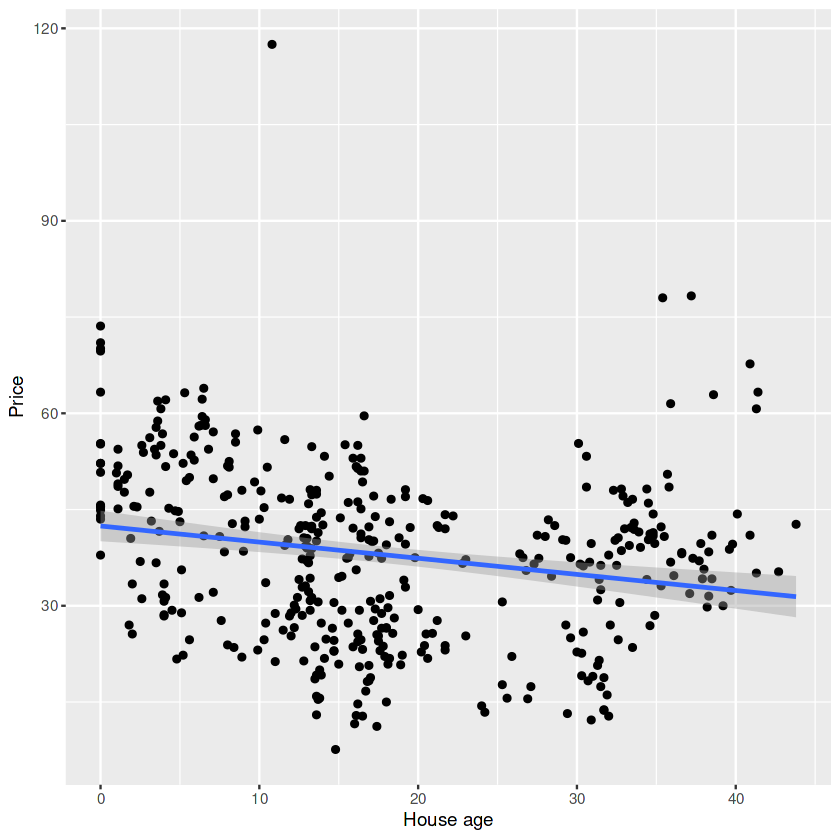

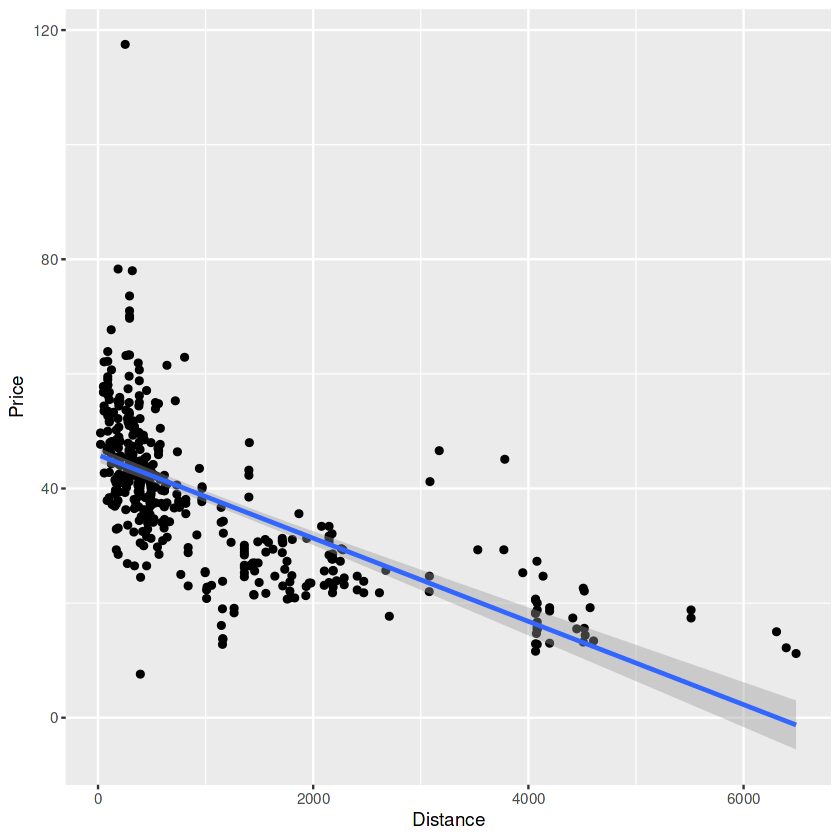

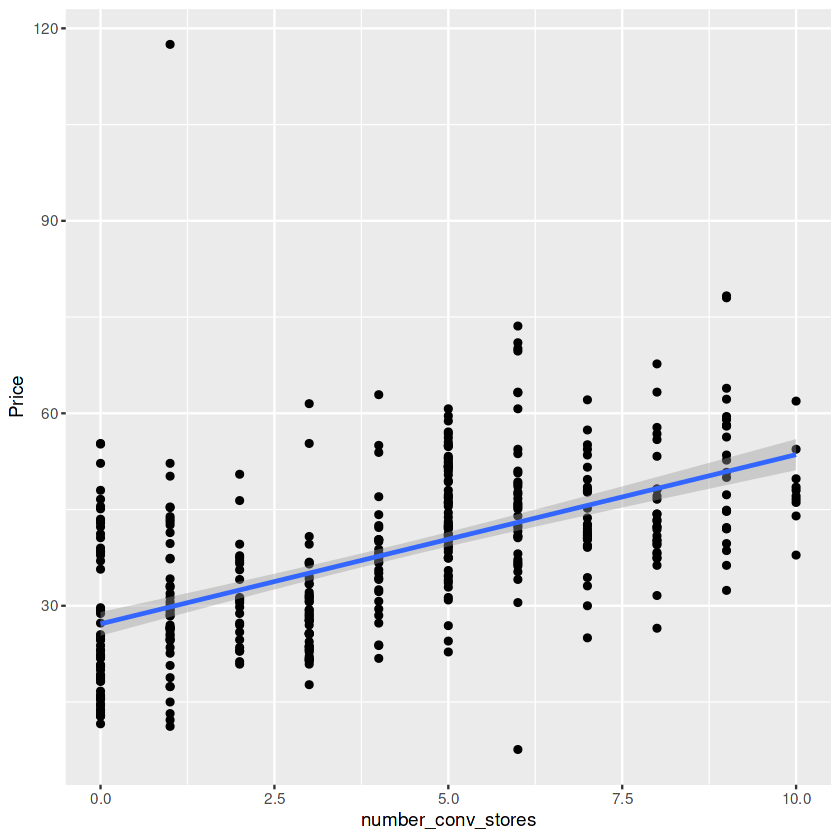

In [ ]:
plot_transac <- ggplot(reg_data, aes(x=transaction_date, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Date") + ylab("Price")
plot_transac

plot_hage <- ggplot(reg_data, aes(x=house_age, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("House age") + ylab("Price")
plot_hage

plot_mrt <- ggplot(reg_data, aes(x=distance_MRT_station, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Distance") + ylab("Price")
plot_mrt

plot_num_convs <- ggplot(reg_data, aes(x=number_conv_stores, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("number_conv_stores") + ylab("Price")
plot_num_convs

**(1)** Dari plot untuk transaction_date model dapat dikatakan sudah cukup fitted terhadap data, maka pemodelan ini yang akan digunakan pada model nantinya.

**(2)** Dari plot house_age terlihat bahwa data tersebar hampir menyerupai bentuk kuadratik yang membuat model awal linier kurang fitted terhadap data.

**(3)** Dari plot distance_mrt terlihat bahwa model masih kurang fitted pada data, khusunya pada house age dibawah 2000. Data tersebar menyerupai bentuk logaritma.

**(4)** Dari plot untuk number_conv_stores model dapat dikatakan sudah cukup fitted terhadap data, maka pemodelan ini yang akan digunakan pada model nantinya.

Akan dilakukan cek model yang lebih mendekati sebaran data untuk (2) dan (3)

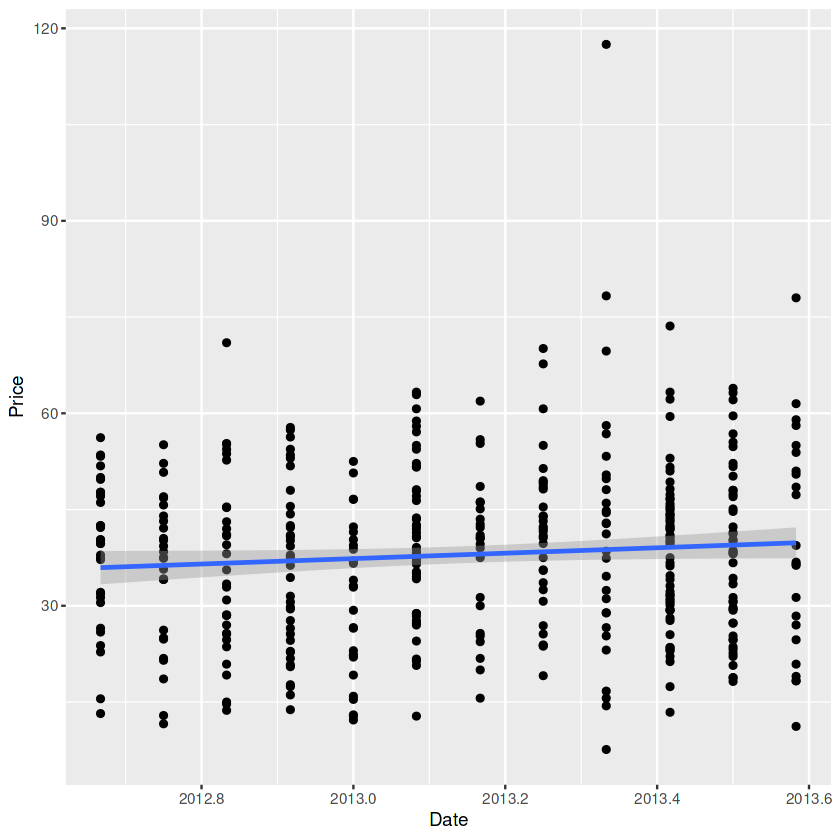

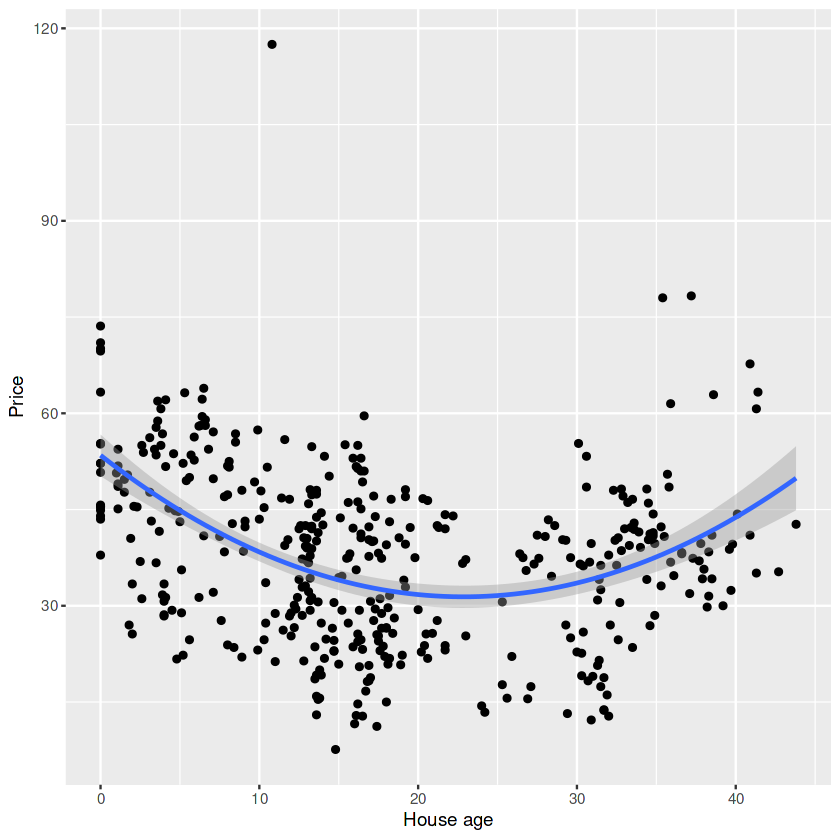

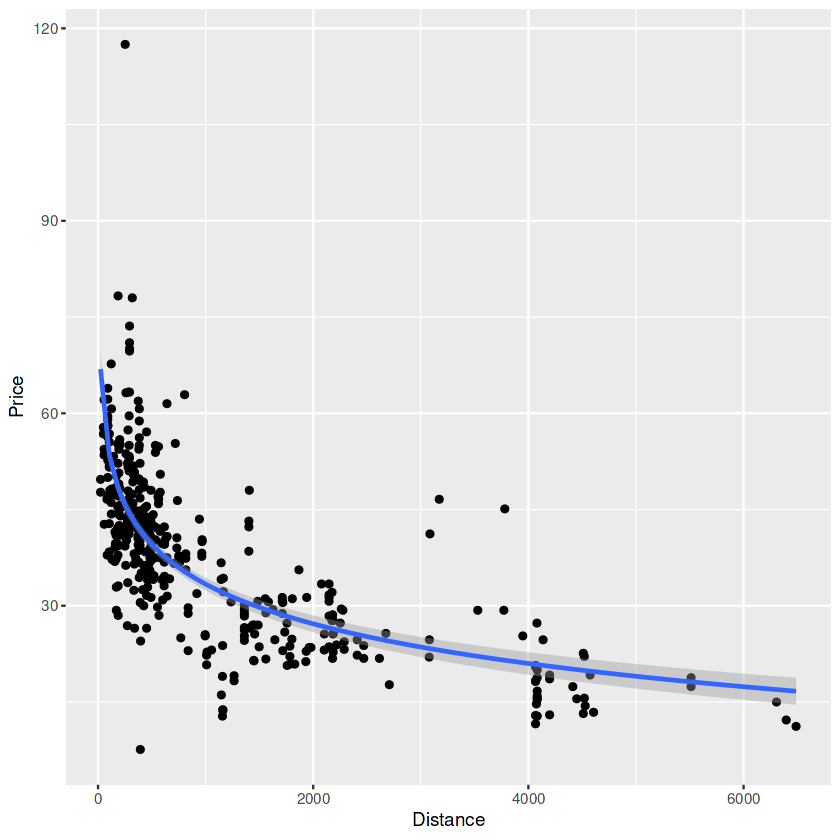

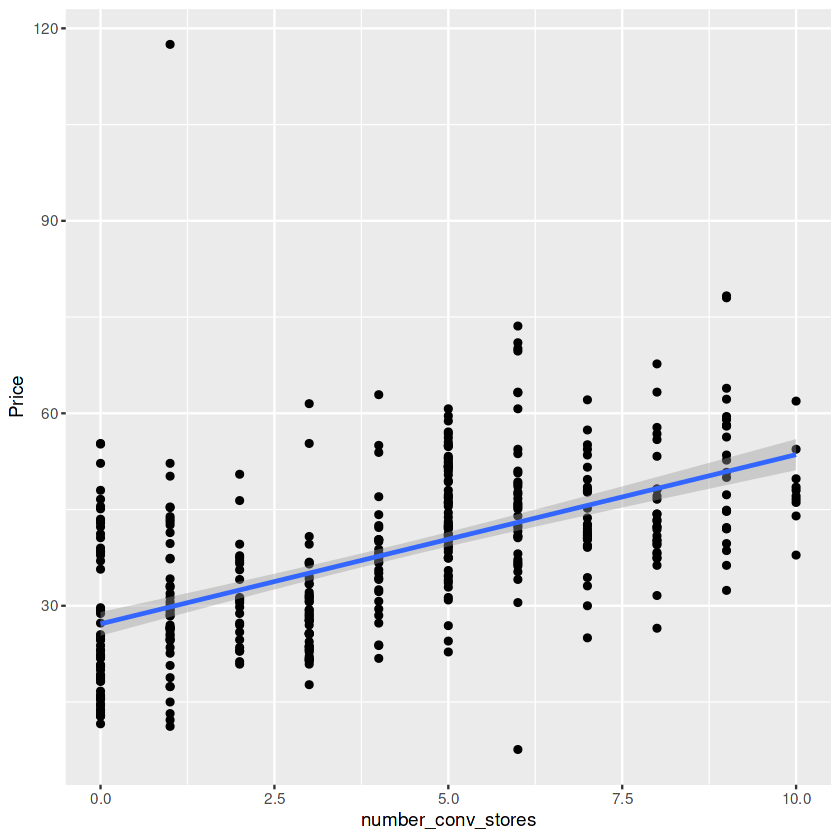

In [ ]:
plot_transac <- ggplot(reg_data, aes(x=transaction_date, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("Date") + ylab("Price")
plot_transac

plot_hage <- ggplot(reg_data, aes(x=house_age, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x+I(x^2)) +
  xlab("House age") + ylab("Price")
plot_hage

plot_mrt <- ggplot(reg_data, aes(x=distance_MRT_station, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~log(x)) +
  xlab("Distance") + ylab("Price")
plot_mrt

plot_num_convs <- ggplot(reg_data, aes(x=number_conv_stores, y = houseprice_unit_area)) +
  geom_point() + stat_smooth(method = lm, formula = y~x) +
  xlab("number_conv_stores") + ylab("Price")
plot_num_convs

Dapat terlihat sekarang pada plot (2) regresi quadratic ini terlihat data telah cukup fitted terhadap model dan pada plot (3) regresi dengan logaritma ini terlihat data telah cukup fitted terhadap model. Maka untuk pemodelan akan dilakukan dengan model yang menyesuaikan sebaran data pada keempat plot ini.

In [ ]:
reg_data$house_age2 <- reg_data$house_age^2
reg_data$distance_MRT_stationl <- log(reg_data$distance_MRT_station)

Dari plot data yang disajikan di awal, kami mencurigai bahwa adanya interaksi dari num_conv_stores dan distance_MRT_Station. Untuk itu kami akan menelusuri apakah ada interaksi tersebut dengan melakukan Pearson test correlation dan juga melihat plot dari keduanya.


	Pearson's product-moment correlation

data:  reg_data$distance_MRT_station and reg_data$number_conv_stores
t = -15.324, df = 412, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6605398 -0.5373447
sample estimates:
       cor 
-0.6025191 


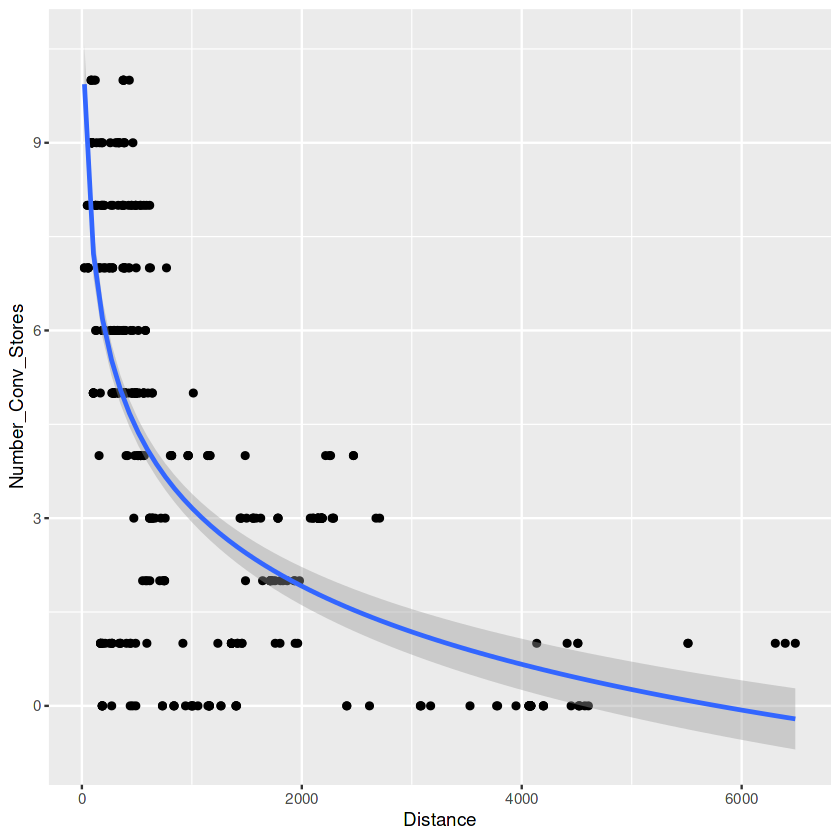

In [ ]:
cor.test(reg_data$distance_MRT_station, reg_data$number_conv_stores, method="pearson")

plot_int <- ggplot(reg_data, aes(x=distance_MRT_station, y = number_conv_stores)) +
  geom_point() + stat_smooth(method = lm, formula = y~log(x)) +
  xlab("Distance") + ylab("Number_Conv_Stores")
plot_int

Dari test pearson untuk korelasi didapatkan nilai p-value < 0.05, maka dapat disimpulkan bahwa korelasi keduanya significant. Terlihat juga pada plot bahwa garis regresi dengan log dari distance_mrt_station dapat dikatakan cukup fitted terhadap sebaran data keduanya. Atas kedua alasan tersebut, kami mempertimbangkan untuk menambahkan adanya interaksi pada model.

**PEMODELAN**

Kami mengajukan 3 model linier yang dapat dipakai untuk melakukan prediksi terhadap house_price_unit area.

* Model 1 merupakan model linier standard dengan setiap variabel memiliki nilai coeficientnya masing masing.

*  Model 2 kami menambahkan quadratic term untuk house_age dan penggunaan log dari variabel distance_MRT. Hal ini kami lakukan setelah melakukan cek sebaran data dari setiap variabel dan menemukan model yang cocok untuk kedua variabel yang diubah tersebut terhadap pesebaran datanya.

* Model 3 hampir sama seperti model 2, tetapi kami menambahkan interaksi dari variabel distance_mrt_station dan num_conv_stores, karena telah dilakukan cek bahwa ada korelasi antara kedua variabel tersebut.

**MODEL 1**

In [ ]:
reg1 <- lm(houseprice_unit_area~transaction_date +
         house_age + distance_MRT_station +
         number_conv_stores, data = reg_data)

summary(reg1)


Call:
lm(formula = houseprice_unit_area ~ transaction_date + house_age + 
    distance_MRT_station + number_conv_stores, data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.389  -5.630  -0.987   4.306  76.006 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.159e+04  3.215e+03  -3.605 0.000351 ***
transaction_date      5.778e+00  1.597e+00   3.618 0.000334 ***
house_age            -2.545e-01  3.953e-02  -6.438 3.40e-10 ***
distance_MRT_station -5.513e-03  4.480e-04 -12.305  < 2e-16 ***
number_conv_stores    1.258e+00  1.918e-01   6.558 1.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.118 on 409 degrees of freedom
Multiple R-squared:  0.5553,	Adjusted R-squared:  0.5509 
F-statistic: 127.7 on 4 and 409 DF,  p-value: < 2.2e-16


**MODEL 2**

In [ ]:
reg2 <- lm(houseprice_unit_area~transaction_date +
         house_age + house_age2 + distance_MRT_stationl +
         number_conv_stores, data = reg_data)

summary(reg2)


Call:
lm(formula = houseprice_unit_area ~ transaction_date + house_age + 
    house_age2 + distance_MRT_stationl + number_conv_stores, 
    data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.949  -4.915  -0.786   3.626  73.403 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.504e+04  3.001e+03  -5.012 8.03e-07 ***
transaction_date       7.515e+00  1.491e+00   5.041 6.99e-07 ***
house_age             -8.273e-01  1.466e-01  -5.644 3.11e-08 ***
house_age2             1.536e-02  3.536e-03   4.344 1.77e-05 ***
distance_MRT_stationl -7.078e+00  5.474e-01 -12.932  < 2e-16 ***
number_conv_stores     6.643e-01  1.968e-01   3.375 0.000809 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.451 on 408 degrees of freedom
Multiple R-squared:  0.6189,	Adjusted R-squared:  0.6142 
F-statistic: 132.5 on 5 and 408 DF,  p-value: < 2.2e-16


**MODEL 3**

In [ ]:
reg3 <- lm(houseprice_unit_area~transaction_date +
         house_age + house_age2 + distance_MRT_stationl +
         number_conv_stores + distance_MRT_stationl*number_conv_stores,
           data = reg_data)

summary(reg3)


Call:
lm(formula = houseprice_unit_area ~ transaction_date + house_age + 
    house_age2 + distance_MRT_stationl + number_conv_stores + 
    distance_MRT_stationl * number_conv_stores, data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.642  -4.698  -0.445   3.382  72.228 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.485e+04  2.976e+03  -4.989 9.03e-07
transaction_date                          7.423e+00  1.479e+00   5.020 7.74e-07
house_age                                -8.226e-01  1.453e-01  -5.660 2.86e-08
house_age2                                1.519e-02  3.507e-03   4.333 1.86e-05
distance_MRT_stationl                    -8.312e+00  6.966e-01 -11.933  < 2e-16
number_conv_stores                       -1.696e+00  8.578e-01  -1.977  0.04873
distance_MRT_stationl:number_conv_stores  3.913e-01  1.385e-01   2.825  0.00495
                                            
(In

In [ ]:
anova(reg1,reg2)
anova(reg1,reg3)
anova(reg2,reg3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,409,34002.58,NA,NA,NA,NA
2,408,29140.63,1,4861.951,68.07252,2.197454e-15


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,409,34002.58,NA,NA,NA,NA
2,407,28580.04,2,5422.538,38.61039,4.427165e-16


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,408,29140.63,NA,NA,NA,NA
2,407,28580.04,1,560.5873,7.98316,0.004953918


Telah terbukti bahwa reg1 dan reg 2 dan reg3 merupakan model yang berbeda, karena setelah dilakukan cek anova p-valuenya < 0.05  dan memiliki nilai yang sangat kecil. Karena sebelumnya kami telah melihat bahwa adanya interaksi pada model 3 dapat meiningkatkan nilai R-squared menjadi yang paling tinggi dari ketiga model. Atas alasan tersebut, kami memilih model 3 untuk dilakukan analisa lebih lanjut.

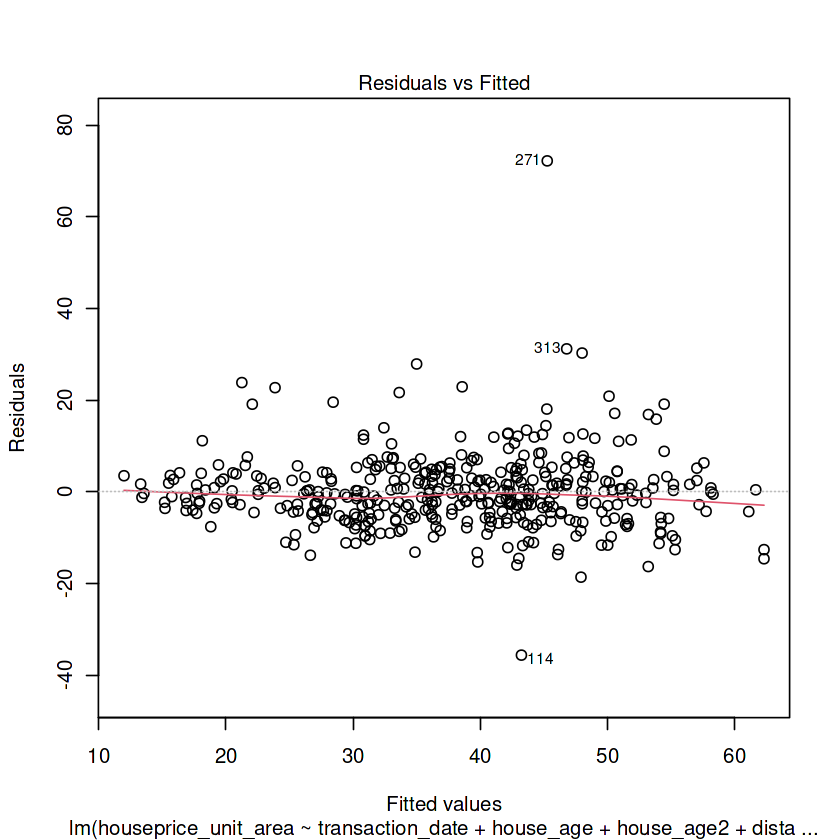

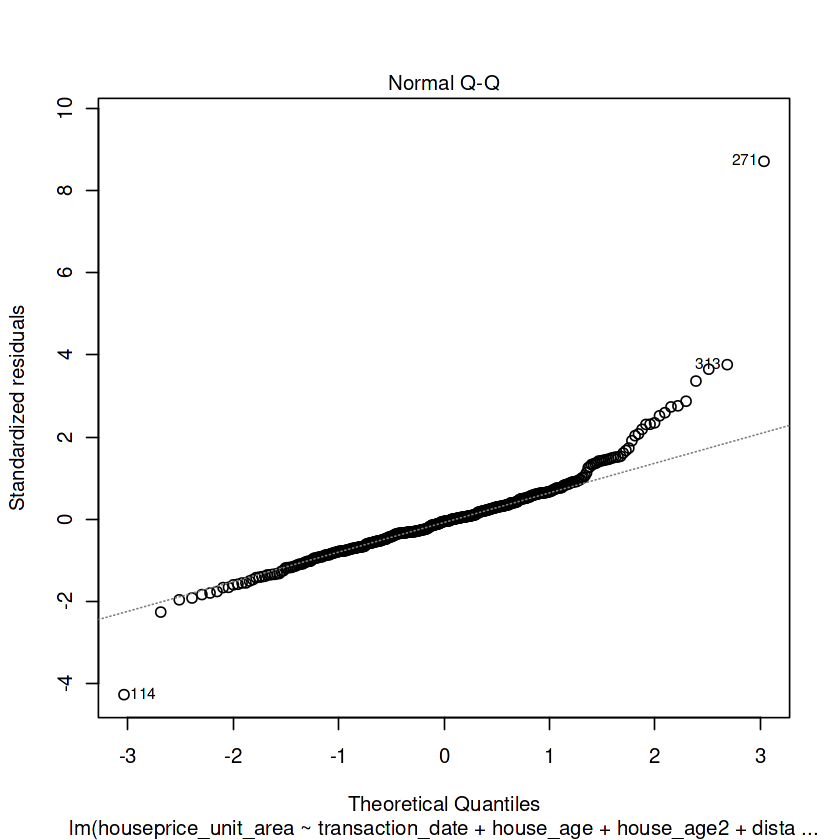

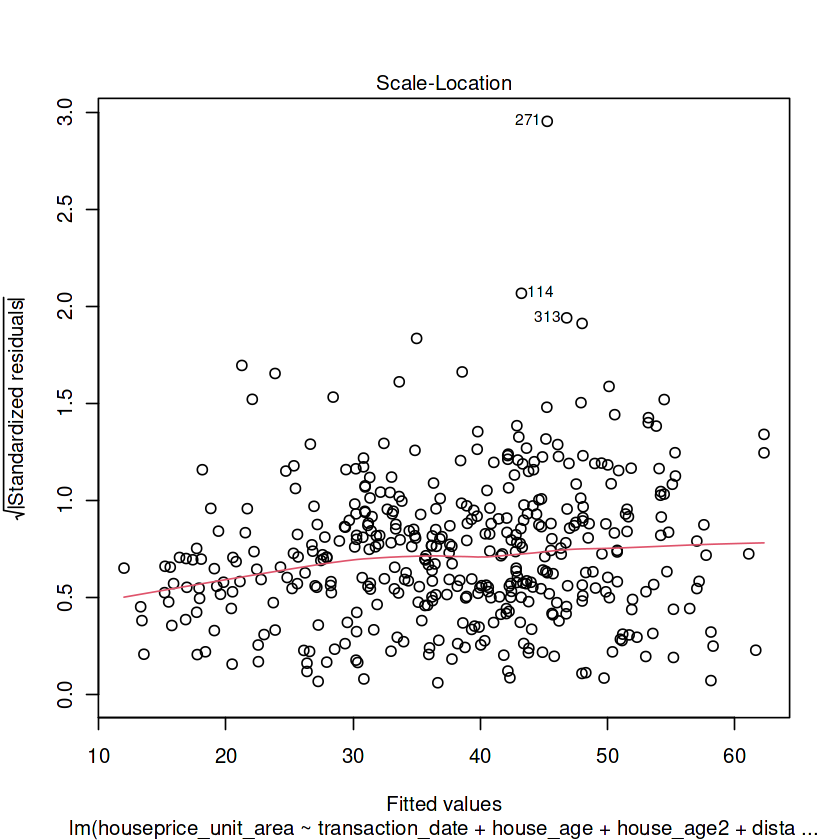

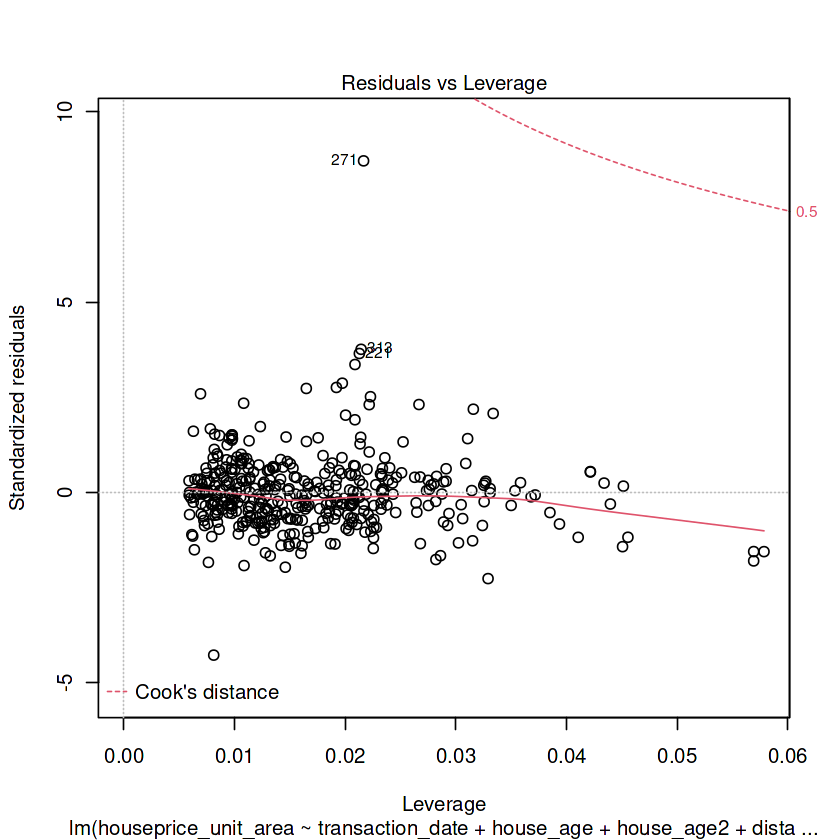

In [ ]:
plot(reg3)

Dalam analisis model, pertama akan dilakukan cek asumsi dari model regresi:

**1. Ekspetasi error untuk populasi bernilai 0**

*Pada grafik (1) terlihat bahwa residual dari setiap nilai dugaan model berada di nilai 0, yang berarti asumsi ekspektai error bernilai 0 untuk populasi dapat diterima.*

**2. Error berdistribussi N(0,1)**

*Pada grafik (2) terlihat bahwa nilai residual standar mendekati nilai standar dari N(0,1) yang digambarkan sebagai garis putuss-putus, yang berarti asumsi error berdistribusi N(0,1) dapat diterima.*

**3. Variansi error bernilai konstan**

*Pada grafik (3) terlihat bahwa akar dari nilai residual standar secara rata-rata tersebar di antara nilai 0 dan 1, yang berarti asumsi bahwa variansi error bernilai konstan dapat diterima.*

In [ ]:
vif(reg3)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



transaction_date 
                                1.022315 
                               house_age 
                               16.124602 
                              house_age2 
                               16.027736 
                   distance_MRT_stationl 
                                3.577682 
                      number_conv_stores 
                               37.546211 
distance_MRT_stationl:number_conv_stores 
                               28.369216

Pada sebuah model yang memiliki interaksi dan quadratic term, tentunya multicollinearity akan muncul pada variabel-variabel yang bersangkutan. Dari hasil yang diperoleh hanya variabel transaction_date yang memiliki nilai vif < 5 dan bebas dari indikasi multicollinearity. Variabel house_age memiliki nilai vif yang tinggi karena quadratic term. Distance_MRT_stationl dan number_conv_stores tentunya memiliki nilai yang sangat tinggi karena adanya interaksi pada kedua variabel tersebut.

Multicollinearity yang muncul pada model ini merupakan hal yang normal dan tidak didapat dihindari. Dalam kehidupan nyata tentunya tidak mungkin apabila suatu variabel independen secara murni, pastinya interaksi tersebut akan muncul secara sengaja atau tidak sengaja. Untuk mengetahui bagaimana variabel-variabel tersebut dapat dikatakan independen, maka akan dilakukan cek apabila tidak digunakan quadratic term dan interaksi.

In [ ]:
reg_check_vif <- lm(houseprice_unit_area~transaction_date +
         house_age + distance_MRT_stationl +
         number_conv_stores, data = reg_data)
vif(reg_check_vif)

transaction_date             house_age distance_MRT_stationl 
             1.021079              1.022322              1.963701 
   number_conv_stores 
             1.941408

Dapat terlihat setelah dilakukan cek untuk variabel house_age juga memiliki nilai vif yang sangat kecil yaitu 1.02. Begitu juga dengan distance_MRT_station dan number_conv_stores yang memiliki nilai sedikit lebih besar karena adanya korelasi pada kedua data tersebut. Terbukti untuk semua variabel memiliki nilai vif yang sangat kecil pada kisaran 1-2, sehingga sebetulnya tidak ada indikasi multicollinearity yang besar atau dapat dikatakan masing-masing variabel independen, sekalipun distance_MRT_station dan num_conv_stores memiliki korelasi.

In [ ]:
summary(reg3)


Call:
lm(formula = houseprice_unit_area ~ transaction_date + house_age + 
    house_age2 + distance_MRT_stationl + number_conv_stores + 
    distance_MRT_stationl * number_conv_stores, data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.642  -4.698  -0.445   3.382  72.228 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.485e+04  2.976e+03  -4.989 9.03e-07
transaction_date                          7.423e+00  1.479e+00   5.020 7.74e-07
house_age                                -8.226e-01  1.453e-01  -5.660 2.86e-08
house_age2                                1.519e-02  3.507e-03   4.333 1.86e-05
distance_MRT_stationl                    -8.312e+00  6.966e-01 -11.933  < 2e-16
number_conv_stores                       -1.696e+00  8.578e-01  -1.977  0.04873
distance_MRT_stationl:number_conv_stores  3.913e-01  1.385e-01   2.825  0.00495
                                            
(In

Dengan model yang telah dibuat terlihat bahwa setiap variabel x memiliki nilai p-value < 0.05, sehingga dapat dikatakan seluruhnya sangat signifikan terhadap variabel responnya.

Model yang dibuat memiliki nilai adjusted R-squared di sekitar 0.6207. Walaupun nilai tersebut masih berada di bawah 0.75 yang menjadi batas bahwa adanya korelasi yang kuat, model yang dibuat dapat diterima dan dapat digunakan dengan cukup baik.

**ANALISIS HASIL**

In [ ]:
summary(reg3)


Call:
lm(formula = houseprice_unit_area ~ transaction_date + house_age + 
    house_age2 + distance_MRT_stationl + number_conv_stores + 
    distance_MRT_stationl * number_conv_stores, data = reg_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.642  -4.698  -0.445   3.382  72.228 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -1.485e+04  2.976e+03  -4.989 9.03e-07
transaction_date                          7.423e+00  1.479e+00   5.020 7.74e-07
house_age                                -8.226e-01  1.453e-01  -5.660 2.86e-08
house_age2                                1.519e-02  3.507e-03   4.333 1.86e-05
distance_MRT_stationl                    -8.312e+00  6.966e-01 -11.933  < 2e-16
number_conv_stores                       -1.696e+00  8.578e-01  -1.977  0.04873
distance_MRT_stationl:number_conv_stores  3.913e-01  1.385e-01   2.825  0.00495
                                            
(In

Dengan nilai p-value setiap variabel yang dibawah 0.05, maka H0 ditolak. Sehingga nilai setiap parameter tidak sama satu dengan yang lainnya dan signifikan terhadap variabel houseprice_unit_area sebagai variabel ressponnya.

Selanjutnya kami akan melakukan analisis terhadap korelasi dari masing-masing variabel terlebih dahulu. Dari model yang dibuat, kita dapat mengetahui korelasi dari nilai estimated parameter setiap variabel. Jika estimated parameter bernilai positif, maka hubungannya adalah korelasi positif. Sedangkan jika estimated parameter bernilai negatif, maka hubungannya adalah korelasi negatif.
1. Transaction date dengan house price berkorelasi linier positif (Semakin barunya suatu rumah yang dibeli akan meningkatkan nilai house price)
2. House age dengan house price berkorelasi linier negatif (Semakin tuanya umur rumah akan menurunkan nilai house price)
3. Distance MRT station dengan house price berkorelasi linier negatif (Semakin jauhnya jarak ke MRT Station akan menurunkan nilai house price)
4. Number convenience store dengan house price berkorelasi linier negatif (Semakin banyaknya convinience store pada suatu kawasan akan menurunkan nilai house price)
5. Interaksi antara Distance MRT station dan Number convenience store dengan house price berkorelasi linier positif (Semakin dekatnya jarak ke MRT Stasion dan semakin banyaknya convenience store pada suatu kawasan akan meningkatkan nilai house price)

Pada hubungan tersebut terlihat 2 kejanggalan:
* Variabel interaksi antara Distance MRT station dan Number convenience store lebih signifikan daripada Number convenience store
* Banyaknya convenience store yang justru menurunkan nilai house price.

Jika kita melihat dalam konteks kehidupan nyata, tentunya di sekitaran MRT Station terdapat banyak convenience store. Pembangungan suatu convenience store akan mengikuti kebutuhan dari bagaimana seseorang beraktivitas setiap hari dan area yang menjadi pusat aktivitas. Hal itu yang menjadi alasan mengapa terdapat banyak convenience store di MRT station atau stasiun transportasi, karena merupakan area yang menjadi pusat aktivitas seseorang setiap harinya. Setelah melihat konteks ini, kejanggalan tersebut dapat terjawab dengan baik, karena adanya suatu MRT station pasti disusul dengan adanya convenience store pada area tersebut.

Variabel convenience store pada model ini memiliki p-value yang hampir mendekati 0.05, sehingga dapat dikatakan tidak signifikan kuat. Seperti yang telah dijelaskan sebelumnya, bagaimana pembangunan convenience store dipengaruhi oleh MRT Station, pada umumnya di beberapa area yang tidak dijangkaui MRT station seperti di daerah bukan perkotaan, convenience store merupakan salah satu hal yang paling utama untuk memenuhi kebutuhan sehari-harinya. Karena hal itu, dapat dikatakan bahwa semakin banyak convenience store yang tidak dipengaruhi oleh MRT station, maka area tersebut diasumiskan jauh dari perkotaan. Kejanggalan banyaknya convenience store yang menurunkan nilai house price, menjadi dapat diterima ketika model memiliki interaksi.

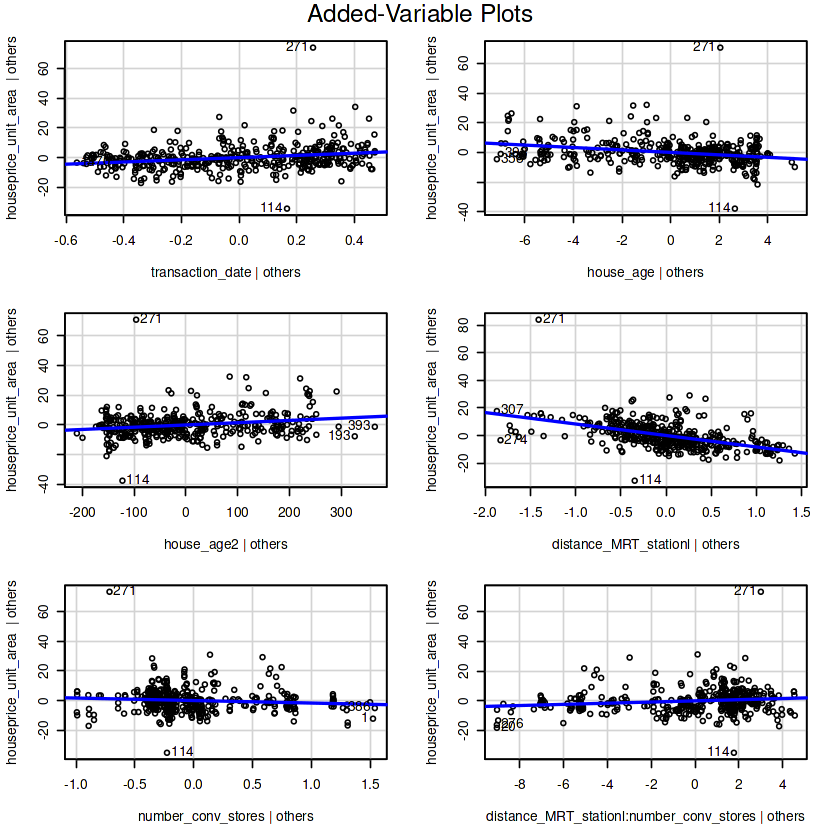

In [ ]:
avPlots(reg3)

Untuk analisis korelasi dari house_age, abaikan plot dari house_age2 yang pada gambar terlihat berkorelasi positif. Estimated parameter dari house_age 2 hanya digunakan untuk membantu meningkatkan fitted model terhadap sebaran data. Jika ingin melihat korelasi untuk house_age dapat hanya melihat plot dari house_age yang berkorelasi negatif. Jadi dapat disimpulkan bahwa plot dari estimated parameter ini menguatkan analisis korelasi yang dibuat sebelumnya adalah benar.

Dari model yang dibuat, kita dapat memberikan suggesstion terkait variabel apa yang paling mempengaruhi tingginya harga suatu rumah. Untuk mencari best predictor variable, kita tidak dapat semata-mata melihat besarnya estimated parameter/coeficient dari model yang dibuat. Akan dilakukan analisis Relative Importance Method untuk melihat variabel yang paling mempengaruhi pada model.

In [ ]:
regressor <- lm(houseprice_unit_area~transaction_date +
         house_age + house_age2 + distance_MRT_stationl +
         number_conv_stores + distance_MRT_stationl*number_conv_stores,
           data = reg_data)
relImportance <- calc.relimp(regressor, type = "lmg", rela = TRUE)
sort(relImportance$lmg, decreasing=TRUE)

distance_MRT_stationl 
                              0.57858070 
                      number_conv_stores 
                              0.26572345 
                               house_age 
                              0.07375790 
                              house_age2 
                              0.04155105 
                        transaction_date 
                              0.02830865 
distance_MRT_stationl:number_conv_stores 
                              0.01207825

Dari hasil ini dapat terlihat bahwa variabel yang paling mempengaruhi harga rumah pada suatu daerah adalah distance_MRT_Stationl (jarak rumah tersebut dengan stasiun MRT). Kemudian variabel yang paling mempengaruhi selanjutnya adalah number_conv_stores (banyaknya toko perbelanjaan), house_age (umur dari suatu rumah), dan yang paling terakhir adalah transaction_date (atau waktu ketika transaksi tersebut dilaksanakan), serta interaksi distance_MRT_stationl dengan num_conv_stores.

Mengapa variabel distance MRT Station dan number convenience store menjadi data yang paling berpengaruh?

Karena umumnya dalam kebutuhan orang yang memiliki rumah, jarak antara tempat tinggal dengan stasiun untuk melakukan transportasi ke tempat kerja ataupun tempat lainnya, dan banyaknya toko perbelanjaan untuk memenuhi kebutuhan hidupnya adalah hal yang paling utama. Hal itu yang membuat rumah di kota-kota besar memiliki harga yang begitu mahal, karena tentunya pembangunan stasiun transportasi dan toko perbelanjaan akan lebih terpusat di kota-kota besar.

Mengapa transaction date menjadi variabel yang paling tidak berpengaruh pada model, selain dari variabel interaksi?

Alasannya adalah karena pada data model ini, transaction date hanya tersebar pada tahun 2012 - 2013. Dalam rentang waktu tersebut, tentunya harga suatu rumah tidak akan mengalami peningkatan yang begitu besar. Tidak seperti dimisalkan perbandingan rumah pada tahun 1950 dengan tahun 2022 yang tentunya akan mengalami peningkatan begitu pesat atas alasan ekonomi dan sebagainya.

**KESIMPULAN**

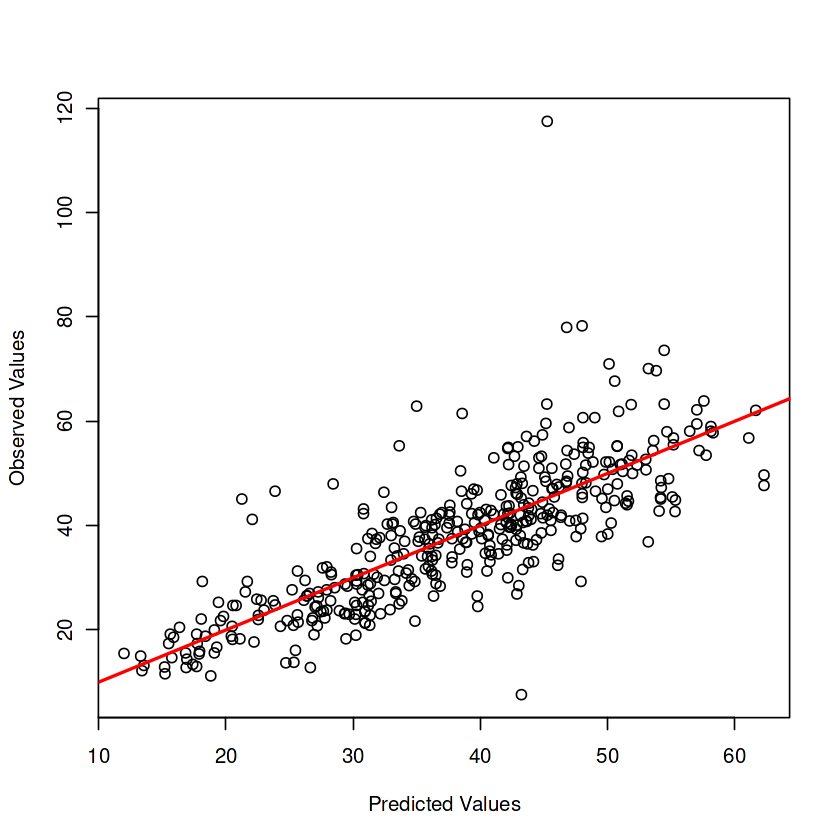

In [ ]:
data_test <- head(reg_data)
plot(predict(reg3),
     reg_data$houseprice_unit_area,
     xlab = "Predicted Values",
     ylab = "Observed Values")
abline(a = 0,
       b = 1,
       col = "red",
       lwd = 2)

Dari plot ini terlihat bahwa nilai observed values dapat dikatakan telah fitted terhadap model atau predicted valuesnya. Dapat disimpulkan bahwa model yang dibuat dengan quadratic terms dan juga menambahkan interaksi dapat menjawab permasalahan dalam melakukan prediksi harga rumah pada suatu kawasan. Dari analisis yang dilakukan, setiap variabel yang membangun model adalah signifikan atau berpengaruh terhadap variabel responnya.

Hasil analisis yang dilakukan juga dapat menjawab pertanyaan variabel yang paling mempengaruhi harga rumah pada suatu daerah, yaitu distance_MRT_Stationl (jarak rumah tersebut dengan stasiun MRT). Kemudian variabel yang paling mempengaruhi selanjutnya adalah number_conv_stores (banyaknya toko perbelanjaan), house_age (umur dari suatu rumah), dan yang paling terakhir adalah transaction_date (atau waktu ketika transaksi tersebut dilaksanakan), serta interaksi distance_MRT_stationl dengan num_conv_stores.